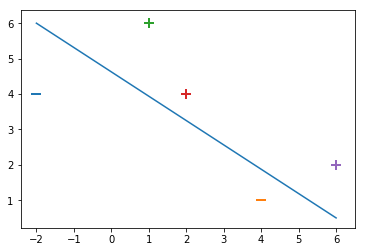

In [18]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1,-1,1,1,1])

for d, sample in enumerate(x):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker="_", linewidth=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker="+", linewidth=2)
        
plt.plot([-2,6],[6,0.5])


In [19]:
def svm_sgd_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    
    epochs = 100000
    errors = []
    
    
    for epoch in range(1,epochs):
        error = 0
        for i,x in enumerate(X):
            if (Y[i]*np.dot(X[i],w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2 * (1/epoch) *w ) )
                error = 1
            else:
                w = w + eta * (-2 * (1/epoch) * w )
        errors.append(error)
        
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('MissClassifed')
    plt.show()
    
    return w

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


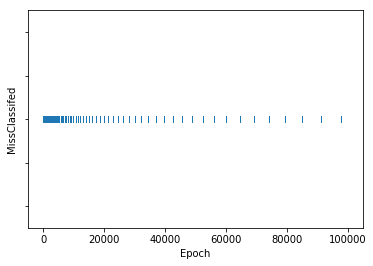

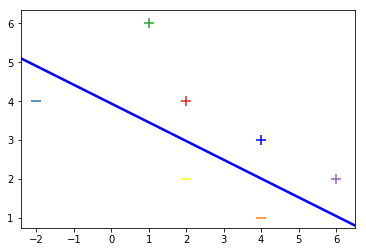

In [20]:
w = svm_sgd_plot(x,y)
for d, sample in enumerate(x):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')